### Loading and prerequesites

In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_full.pkl")

### General overview over the dataset

In [3]:
df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631
...,...,...,...,...,...,...,...,...
4853,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,6 an anfang drei frage 1 können wir anderer mi...,305
4854,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266
4855,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr kü...,912
4856,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2548


In [4]:
print("First Textual Overview of the Dataset:")
print("------------------------")
print("First Publication Year:", df['publication_date'].min().year)
print("Last Publication Year:", df['publication_date'].max().year)
print("Total Number of Publications:", len(df))
print("\nNumber of Publications per Year:")
print(df['publication_year'].value_counts().sort_index())
print("\nNumber of Publications per Publisher:")
print(df['publisher'].value_counts())

First Textual Overview of the Dataset:
------------------------
First Publication Year: 1994
Last Publication Year: 2023
Total Number of Publications: 4858

Number of Publications per Year:
publication_year
1994     18
1995     20
1996     29
1997     49
1998     60
1999     97
2000    100
2001     62
2002     62
2003    147
2004    304
2005    186
2006    143
2007    121
2008    150
2009    135
2010     93
2011     99
2012    121
2013    147
2014    224
2015    182
2016    207
2017    125
2018    262
2019    234
2020    194
2021    324
2022    331
2023    632
Name: count, dtype: int64

Number of Publications per Publisher:
publisher
taz, die tageszeitung             428
Lebensmittel Zeitung              371
Frankfurter Rundschau             167
Stuttgarter Zeitung               161
dpa-AFX ProFeed                   149
                                 ... 
ComputerBild                        1
Computerwoche                       1
manager magazin premium             1
St.Galler Tagbla

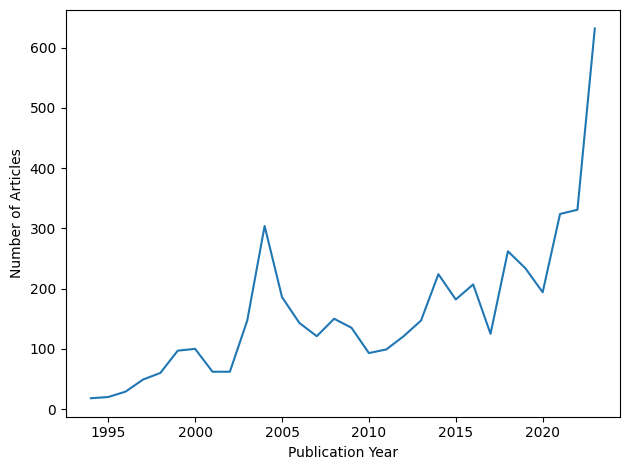

In [5]:
df['publication_year'].value_counts().sort_index().plot(legend = None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.savefig('../Visuals/articles_per_year.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:          article_count   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     64.80
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           9.14e-09
Time:                        09:27:52   Log-Likelihood:                -165.11
No. Observations:                  30   AIC:                             334.2
Df Residuals:                      28   BIC:                             337.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.083e+04   2605.731  

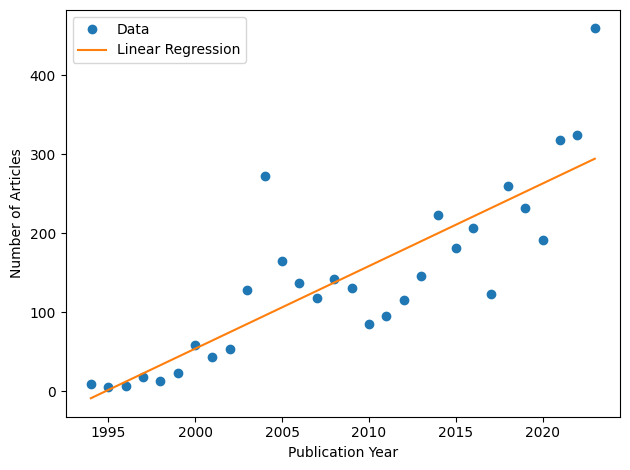

In [6]:
# Overview over yearly publications
# Calculate the number of articles published per year and add it as a column to a new dataframe
df_year = df.groupby('publication_year').count()
df_year = df_year[['title']]
df_year.columns = ['article_count']
df_year = df_year.reset_index()

# Fit a linear regression curve to the data
X = sm.add_constant(df_year['publication_year'])
y = df_year['article_count']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_year['publication_year'], y, 'o', label='Data')
plt.plot(df_year['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.savefig('../Visuals/articles_per_year_regression.png')
plt.show()

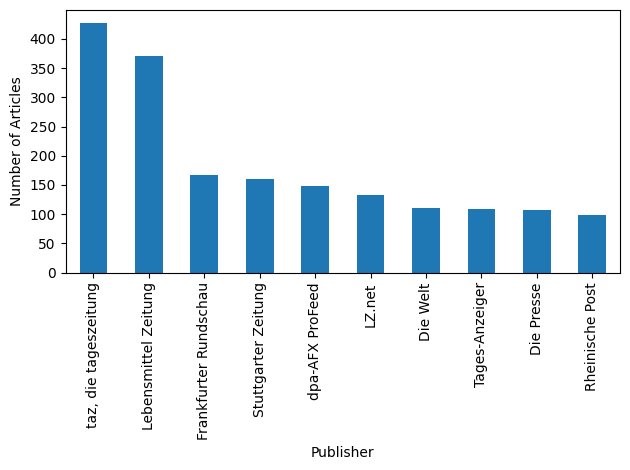

In [7]:
# Overview over publishers with most publications
df['publisher'].value_counts().nlargest(10).plot(legend = None, kind='bar',)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.savefig('../Visuals/top_10_publishers.png')
plt.show()

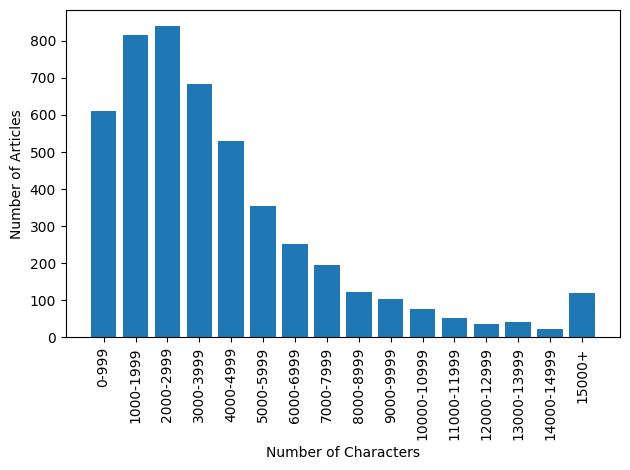

In [8]:
# Overview over articles length
# Define the intervals
intervals = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, float('inf')]

# Group the articles based on length intervals
grouped_articles = df.groupby(pd.cut(df['text'].str.len(), intervals)).size()

# Plot the bar plot
plt.bar(range(len(grouped_articles)), grouped_articles)

# Set the x-axis labels
plt.xticks(range(len(grouped_articles)), [f'{int(x.left)}-{int(x.right-1)}' if x.right != float('inf') else f'{int(x.left)}+' for x in grouped_articles.index], rotation=90)

# Set the x-axis label
plt.xlabel('Number of Characters')

# Set the y-axis label
plt.ylabel('Number of Articles')

# Save the plot
plt.savefig('../Visuals/articles_grouped_by_length.png')

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:        avg_text_length   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     17.52
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           0.000255
Time:                        09:29:38   Log-Likelihood:                -234.16
No. Observations:                  30   AIC:                             472.3
Df Residuals:                      28   BIC:                             475.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.048e+05    2.6e+04  

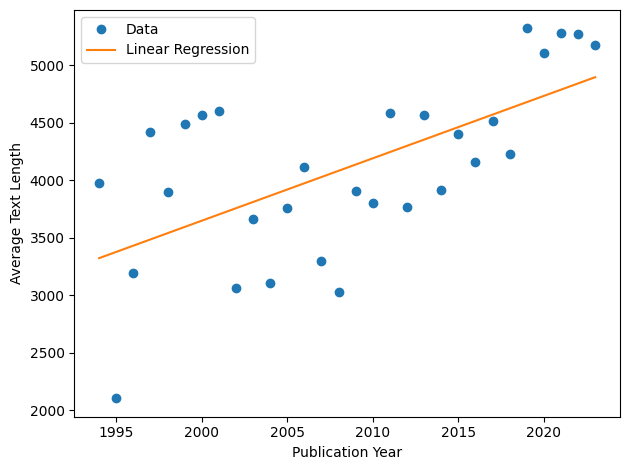

In [9]:
# Calculate the average length of text for each publication year
df_grouped = df.groupby('publication_year')['text'].apply(lambda x: x.str.len().mean()).reset_index()

# Rename the colum text to avg_text_length in the new dataframe
df_grouped.rename(columns={'text': 'avg_text_length'}, inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['avg_text_length']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Average Text Length')
plt.legend()
plt.savefig('../Visuals/yearly_text_length.png')
plt.show()

### Frequent words

In [10]:
# Use small spacy model
nlp = spacy.load("de_core_news_sm")

# Add a column with the spacy doc object for each article
df['spacy_doc'] = df['text'].apply(nlp)

spacy_doc
Lebensmittel    6829
Fleisch         6370
Prozent         5748
Produkt         5741
gentechnisch    4918
Mensch          4472
Unternehmen     4169
Deutschland     3763
verändert       3562
Gentechnik      3555
USA             3337
stehen          3195
sehen           3174
Tier            3116
Pflanze         2912
Verbraucher     2866
deutsch         2832
Fuer            2767
EU              2631
Markt           2607
Name: count, dtype: int64


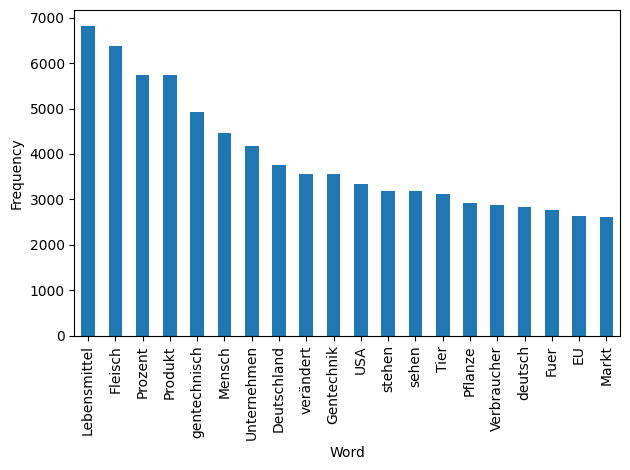

In [11]:
# Find the most frequent words in df and their frequencies
word_freq = df['spacy_doc'].apply(lambda x: [token.lemma_ for token in x if not token.is_stop and not token.is_punct and not token.is_digit]).explode().value_counts()
#word_freq = df['spacy_doc'].apply(lambda x: [token.lemma_ for token in x]).explode().value_counts()

# Remove whitespace-only strings
word_freq = word_freq[word_freq.index.str.strip() != '']

# Remove double lines
word_freq = word_freq[word_freq.index.str.strip() != '--']

# Workaround: Remove all texts where the words "and", "the", "to" and "of" appear more than twice.
# No longer needed since all non-german articles have been removed
#word_freq = word_freq[(word_freq.index != 'and') & (word_freq.index != 'the') & (word_freq.index != 'The') & (word_freq.index != 'to') & (word_freq.index != 'of')]
#word_freq = word_freq[word_freq > 2]

# Print the most frequent words as text
print(word_freq.nlargest(20))

# Plot the 20 most frequent words
word_freq.nlargest(20).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.savefig('../Visuals/top_20_words.png')
plt.show()

In [12]:
# Find the texts with the most occurences of "Prozent"
df['prozent_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'Prozent']))
df['prozent_count'].nlargest(10)

# Print the texts with the most occurences of "Prozent", the frequency of the word "Prozent" and the publisher of the article
for i in df['prozent_count'].nlargest(50).index:
    print(df.loc[i]['publisher'])
    print(df.loc[i]['title'])
    print(df.loc[i]['text'])
    print(df.loc[i]['prozent_count'])
    print('------------------------')

print()

print(str(sum(df['prozent_count'] > 5)) + ' Artikel mit mehr als 5 Vorkommen von Prozent')
print(str(sum(df['prozent_count'] > 50)) + ' Artikel mit mehr als 50 Vorkommen von Prozent')


Bayerischer Rundfunk
Börse: Die Entwicklungen im Juni 2023
22.00 Uhr - Wall Street schließt mit kräftigen Gewinnen Die US-Börsen können nach einer eher zähen Woche zum Ende kräftige Gewinne verbuchen: Der Dow Jones ist fast ein Prozent fester aus dem Handel gegangen, der Nasdaq konnte um anderthalb Prozent zulegen... 22.00 Uhr - Wall Street schließt mit kräftigen Gewinnen  Die US-Börsen können nach einer eher zähen Woche zum Ende kräftige Gewinne verbuchen: Der Dow Jones ist fast ein Prozent fester aus dem Handel gegangen, der Nasdaq konnte um anderthalb Prozent zulegen. Positiv kamen bei Anlegern unter anderem die stagnierenden US-Konsumausgaben im Mai an. Gefragt waren außerdem Tech-Werte und Banken-Titel. Apple hat erstmals in der Geschichte zu Börsenschluss einen Wert von mehr als drei Billionen Dollar.  21.09 Uhr - US-Banken an der Wall Street gefragt  In den USA greifen Anlegerinnen und Anleger bei den Aktien von Banken zu: JP Morgan, Bank of America, Wells Fargo und Morgan Stanl

In [72]:
# Visualize the distribution of the number of occurences of "gentechnich" or "Gentechnik" in the articles over the years
df['gentechnik_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'Gentechnik']))
df['gentechnik_count'] += df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'gentechnisch']))

# Introduce a new column "gentechnik_bool" which is True if the article contains the word "gentechnich" or "Gentechnik" and False otherwise
df['gentechnik_bool'] = df['gentechnik_count'] > 0

# Group by year and calculate the total number of occurences for each year
df_gentechnik = df.groupby('publication_year')['gentechnik_count'].sum().reset_index()

# Calculate the ratio of "gentechnich" or "Gentechnik" over the number of words in the articles over the years
df_gentechnik['gentechnik_ratio'] = df_gentechnik['gentechnik_count'] / df.groupby('publication_year')['text'].apply(lambda x: sum([len(token) for token in x])).reset_index()['text']

# Calculate the ratio of articles containing "gentechnich" or "Gentechnik" over the years
df_gentechnik['gentechnik_bool_ratio'] = df.groupby('publication_year')['gentechnik_bool'].mean().reset_index()['gentechnik_bool']

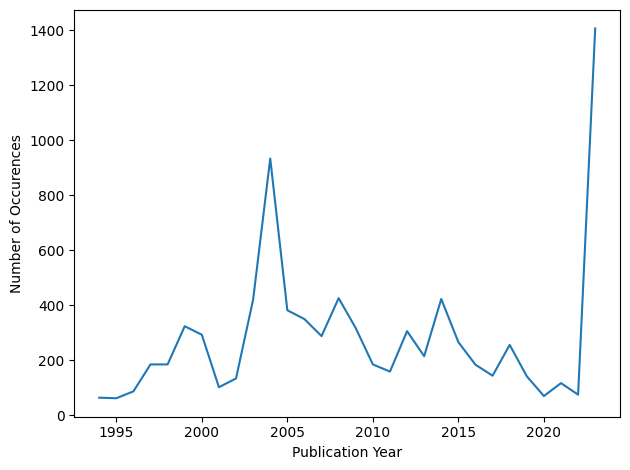

In [77]:
# Visualize the column "gentechnik_count"
df_gentechnik.plot(x='publication_year', y='gentechnik_count', legend=None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurences')
plt.savefig('../Visuals/gentechnik_count.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:       gentechnik_ratio   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           2.00e-08
Time:                        11:09:51   Log-Likelihood:                 215.73
No. Observations:                  30   AIC:                            -427.5
Df Residuals:                      28   BIC:                            -424.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0624      0.008  

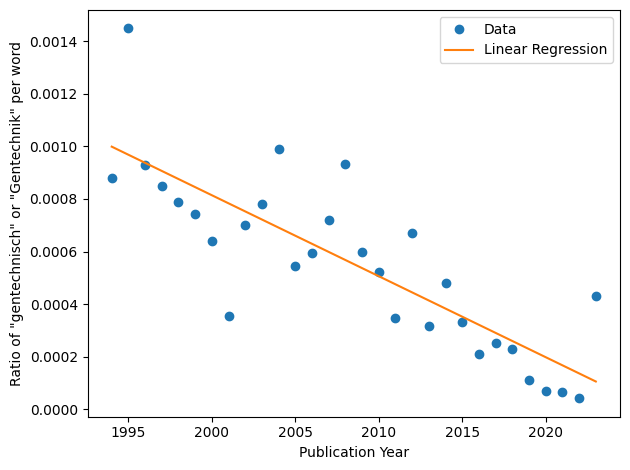

In [75]:
# Visualize the column "gentechnik_ratio"
# Fit a linear regression curve to the data
X = sm.add_constant(df_gentechnik['publication_year'])
y = df_gentechnik['gentechnik_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_gentechnik['publication_year'], y, 'o', label='Data')
plt.plot(df_gentechnik['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of "gentechnisch" or "Gentechnik" per word')
plt.legend()
plt.savefig('../Visuals/gentechnik_ratio.png')
plt.show()

                              OLS Regression Results                             
Dep. Variable:     gentechnik_bool_ratio   R-squared:                       0.797
Model:                               OLS   Adj. R-squared:                  0.790
Method:                    Least Squares   F-statistic:                     110.2
Date:                   Sat, 27 Jan 2024   Prob (F-statistic):           3.25e-11
Time:                           11:09:00   Log-Likelihood:                 26.718
No. Observations:                     30   AIC:                            -49.44
Df Residuals:                         28   BIC:                            -46.63
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

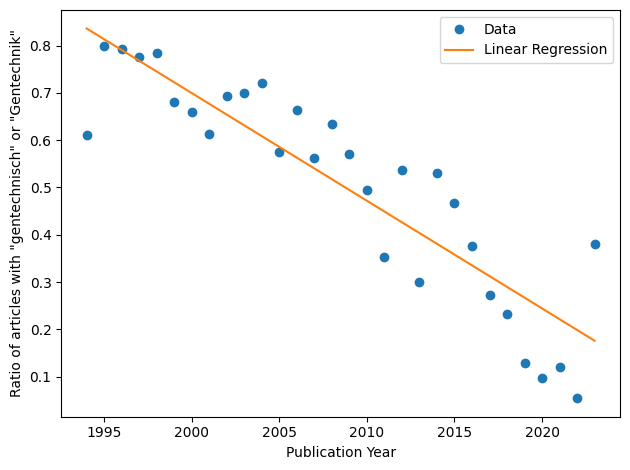

In [73]:
# Visualize the column "gentechnik_bool_ratio"
# Fit a linear regression curve to the data
X = sm.add_constant(df_gentechnik['publication_year'])
y = df_gentechnik['gentechnik_bool_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_gentechnik['publication_year'], y, 'o', label='Data')
plt.plot(df_gentechnik['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with "gentechnisch" or "Gentechnik"')
plt.legend()
plt.savefig('../Visuals/gentechnik_bool_ratio.png')
plt.show()

### Questions

In [13]:
def count_questions(text):
    return sum(1 for sent in text.sents if sent.text.strip().endswith('?'))

In [14]:
df['questions_count'] = df["spacy_doc"].apply(count_questions)

In [15]:
# Add a column with the number of characters in the text
df['characters_count'] = df['text'].str.len()

# Add a column with the ratio of questions to characters
df['questions_ratio'] = df['questions_count'] / df['characters_count']

In [16]:
df
df_sorted = df.sort_values(by='questions_ratio', ascending=False)
df_sorted

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,questions_count,characters_count,questions_ratio
3966,67DH39P1JC8114CH0000000,"Vegan, aber ?Fleischerei??",2023-01-27,2023,Sächsische Zeitung Regionalausgaben,Schnitzel- und Fleischkäsebrötchen auf die Han...,schnitzel und fleischkäsebrötchen auf der hand...,583,"(Schnitzel-, und, Fleischkäsebrötchen, auf, di...",0,41,4195,0.009774
683,5S2T9DY1JCTWB3T40000000,1 Essen nach maß 30 31 38 41,2018-04-11,2018,Der Standard,19 24 Mythen im Faktencheck Was bringen Detox-...,19 24 mythos in faktencheck was bringen detoxf...,15,"(19, 24, Mythen, im, Faktencheck, Was, bringen...",0,1,108,0.009259
418,5WWBF9D1F07YK01F0000000,FOOD-NEWS,2019-08-22,2019,Bunte,Wurst- und Fleisch-alternativen EVENTLOCATION ...,wurst und fleischalternativen eventlocation in...,11,"(Wurst-, und, Fleisch-alternativen, EVENTLOCAT...",0,1,108,0.009259
813,7XMCMWY12RKCK2JP0000000,Der Mai ist nicht gekommen Von Harald Martenstein,2010-01-24,2010,Der Tagesspiegel,Im Mai wird die Sonne scheinen - ganz bestimmt...,in mai werden der sonne scheinen ganz bestim...,383,"(Im, Mai, wird, die, Sonne, scheinen, -, ganz,...",0,20,2371,0.008435
4850,5NV18G31F15WB0890000000,FORSCHUNG & TECHNIK,2017-06-20,2017,ZEIT Wissen,"Tanker, Frachter, Piraten: Auf dem Meer ist wa...",tanker frachter pirat auf der meer sein was lo...,295,"(Tanker, ,, Frachter, ,, Piraten, :, Auf, dem,...",0,14,1918,0.007299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,640793H1F06WT1TM0000000,Empfehlung für Platzierung: Beyond Meat will n...,2021-11-01,2021,LZ.net,Flexitarier in den USA kaufen pflanzliche Flei...,flexitarier in der usa kaufen pflanzlich fleis...,651,"(Flexitarier, in, den, USA, kaufen, pflanzlich...",2,0,4695,0.000000
2694,64KGXWR1F06WT0D60000000,Geschäftserholung: Transgourmet wächst wieder,2022-01-21,2022,LZ.net,Bei Transgourmet läuft es wieder besser: Der F...,bei transgourmet laufen es wieder gut der food...,436,"(Bei, Transgourmet, läuft, es, wieder, besser,...",5,0,3111,0.000000
2695,64N0R461F06WT2BT0000000,Fleischersatz: Hilcona expandiert mit Veggie-M...,2022-01-28,2022,LZ.net,Nach der Einführung in Deutschland nimmt Hilco...,nach der einführung in deutschland nehmen hilc...,229,"(Nach, der, Einführung, in, Deutschland, nimmt...",0,0,1581,0.000000
2696,64T25TR1JCRV34SM0000000,Pflanzenbasiertes Hähnchenfleisch: Next Gen Fo...,2022-02-16,2022,LZ.net,Das Veggie-Startup Next Gen Foods sichert sich...,der veggiestartup next gen foods sichern sich ...,367,"(Das, Veggie-Startup, Next, Gen, Foods, sicher...",0,0,2538,0.000000


                            OLS Regression Results                            
Dep. Variable:        questions_ratio   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     18.90
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           0.000164
Time:                        09:33:38   Log-Likelihood:                -19.769
No. Observations:                  30   AIC:                             43.54
Df Residuals:                      28   BIC:                             46.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -87.5744     20.510  

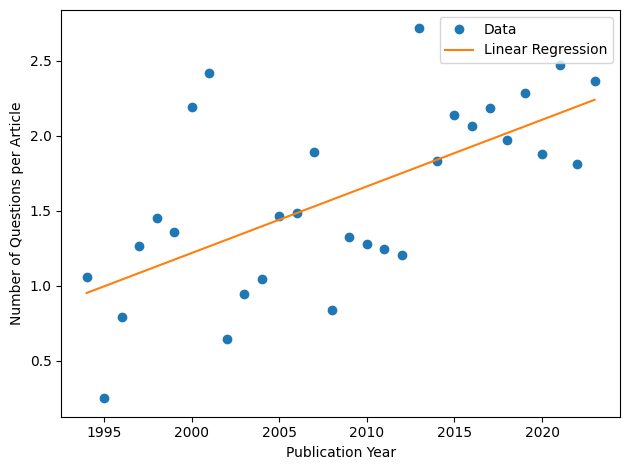

In [17]:
# Visualize the number of questions per article per year and fit a linear regression curve to the data
# Group by year and calculate the total number of questions and total number of articles for each year
df_grouped = df.groupby('publication_year').agg({'questions_count': 'sum', 'text': 'count'})

# Calculate the ratio of questions to total articles for each year
df_grouped['questions_ratio'] = df_grouped['questions_count'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['questions_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Number of Questions per Article')
plt.legend()
plt.savefig('../Visuals/questions_ratio_per_text.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:        questions_ratio   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     9.872
Date:                Sat, 27 Jan 2024   Prob (F-statistic):            0.00394
Time:                        09:33:38   Log-Likelihood:                 235.07
No. Observations:                  30   AIC:                            -466.1
Df Residuals:                      28   BIC:                            -463.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0128      0.004  

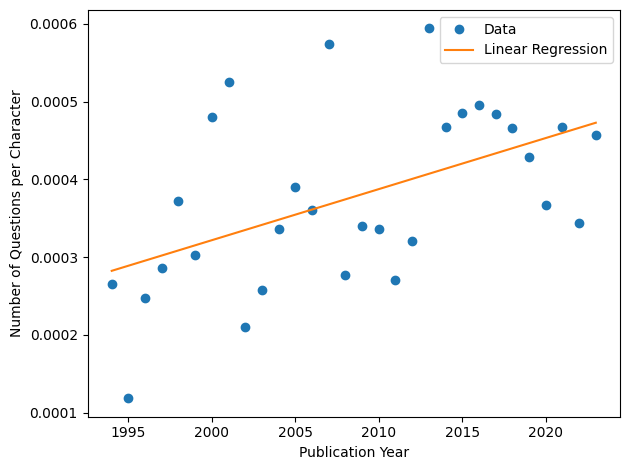

In [18]:
# Visualize the ratio of questions to characters per year and fit a linear regression curve to the data
# Group by year and calculate the total number of questions and total number of characters for each year
df_grouped = df.groupby('publication_year').agg({'questions_count': 'sum', 'characters_count': 'sum'})

# Calculate the ratio of questions to total characters for each year
df_grouped['questions_ratio'] = df_grouped['questions_count'] / df_grouped['characters_count']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['questions_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Number of Questions per Character')
plt.legend()
plt.savefig('../Visuals/questions_ratio_per_character.png')
plt.show()

### Pronouns with spacy

In [19]:
#df = pd.read_pickle("../Data/df_full.pkl")

# Use small spacy model
nlp = spacy.load('de_core_news_sm')

df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,questions_count,characters_count,questions_ratio
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,"(Wenn, Großbritannien, Ende, März, den, Aussti...",7,1,5529,0.000181
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,0,5177,0.000000
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,0,4622,0.000000
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,"(Maastricht, (, AP, ), -, Das, niederländische...",0,0,1575,0.000000
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,"(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",2,0,4588,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,6 an anfang drei frage 1 können wir anderer mi...,305,"(6, Am, anfang, drei, Fragen, 1., Können, wir,...",0,12,1866,0.006431
4854,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266,"(Ein, saftiges, Filet, ,, für, das, kein, Huhn...",0,0,1849,0.000000
4855,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr kü...,912,"(John, Dickie, :, », Delizia, !, Die, Italiene...",0,2,6061,0.000330
4856,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2548,"(Es, ist, der, letzte, Tag, auf, der, Lebensmi...",3,8,18345,0.000436


In [20]:
# Add four new columns to the dataframe called 'word_count', 'du_count', 'ihr_count', 'du_ihr_count'
df['word_count'] = 0
df['du_count'] = 0
df['ihr_count'] = 0
df['du_ihr_count'] = 0

# Add three new columns to the dataframe called 'has_du', 'has_ihr' and 'has_du_ihr'
df['has_du'] = False
df['has_ihr'] = False
df['has_du_ihr'] = False

# Define the variants of 'Du' and 'Ihr'
du_variants = ['du', 'dich', 'dein', 'deine', 'deines', 'deiner', 'dir']
ihr_variants = ['ihr', 'euch', 'euer', 'eure', 'eures', 'eurer', 'eur']

# Iterate over the dataframe and count the number of words, 'Du', 'Ihr' and 'Du' and 'Ihr' in each text
for index in df.index:
    doc = nlp(df['clean_text'][index])
    df.loc[index, 'word_count'] = len(doc)
    df.loc[index, 'du_count'] = sum([1 for token in doc if token.text in du_variants])
    df.loc[index, 'ihr_count'] = sum([1 for token in doc if token.text in ihr_variants])
    df.loc[index, 'du_ihr_count'] = df.loc[index, 'du_count'] + df.loc[index, 'ihr_count']

    # Fill the columns 'has_du', 'has_ihr' and 'has_du_ihr' with True if the text contains 'Du', 'Ihr' or 'Du' and 'Ihr'
    if df.loc[index, 'du_count'] > 0:
        df.loc[index, 'has_du'] = True
    if df.loc[index, 'ihr_count'] > 0:
        df.loc[index, 'has_ihr'] = True
    if df.loc[index, 'du_ihr_count'] > 0:
        df.loc[index, 'has_du_ihr'] = True

df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,questions_count,characters_count,questions_ratio,du_count,ihr_count,du_ihr_count,has_du,has_ihr,has_du_ihr
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,"(Wenn, Großbritannien, Ende, März, den, Aussti...",7,1,5529,0.000181,0,5,5,False,True,True
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,0,5177,0.000000,0,1,1,False,True,True
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,0,4622,0.000000,0,4,4,False,True,True
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,"(Maastricht, (, AP, ), -, Das, niederländische...",0,0,1575,0.000000,0,0,0,False,False,False
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,"(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",2,0,4588,0.000000,0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,6 an anfang drei frage 1 können wir anderer mi...,305,"(6, Am, anfang, drei, Fragen, 1., Können, wir,...",0,12,1866,0.006431,1,1,2,True,True,True
4854,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266,"(Ein, saftiges, Filet, ,, für, das, kein, Huhn...",0,0,1849,0.000000,0,0,0,False,False,False
4855,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr kü...,912,"(John, Dickie, :, », Delizia, !, Die, Italiene...",0,2,6061,0.000330,0,6,6,False,True,True
4856,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2548,"(Es, ist, der, letzte, Tag, auf, der, Lebensmi...",3,8,18345,0.000436,0,12,12,False,True,True


In [21]:
df_yearly_overview = pd.DataFrame(columns=['publication_year', 'publication_count', 'word_count', 'du_count', 'ihr_count', 'du_ihr_count'])

# Fill the dataframe with the data
for index in df.index:
    year = df["publication_year"][index]
    if year not in df_yearly_overview['publication_year'].values:
        df_yearly_overview = pd.concat([df_yearly_overview, pd.DataFrame({'publication_year': year, 'publication_count': 0, 'word_count': 0, 'du_count': 0, 'ihr_count': 0, 'du_ihr_count': 0}, index=[0])])
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'publication_count'] += 1
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'word_count'] += df["word_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'du_count'] += df["du_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'ihr_count'] += df["ihr_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'du_ihr_count'] += df["du_ihr_count"][index]

# Sort the dataframe by publication_year
df_yearly_overview = df_yearly_overview.sort_values(by='publication_year')

# Reindex the dataframe
df_yearly_overview = df_yearly_overview.reset_index(drop=True)

df_yearly_overview

,publication_year,publication_count,word_count,du_count,ihr_count,du_ihr_count
0,1994,18,9408,0,59,59
1,1995,20,5510,2,25,27
2,1996,29,12124,0,27,27
3,1997,49,28409,0,86,86
4,1998,60,31397,18,103,121
5,1999,97,58204,4,220,224
6,2000,100,62409,8,268,276
7,2001,62,38951,14,166,180
8,2002,62,25265,1,98,99
9,2003,147,72885,3,323,326


In [22]:
# Add newcolumns to the dataframe called 'articles_with_du_count', 'articles_without_du_count', 'articles_with_ihr_count', 'articles_without_ihr_count', 'articles_with_du_ihr_count', 'articles_without_du_ihr_count'
df_yearly_overview['articles_with_du_count'] = 0
df_yearly_overview['articles_without_du_count'] = 0
df_yearly_overview['articles_with_ihr_count'] = 0
df_yearly_overview['articles_without_ihr_count'] = 0
df_yearly_overview['articles_with_du_ihr_count'] = 0
df_yearly_overview['articles_without_du_ihr_count'] = 0

# Iterate over df and count the number of articles with and without 'Du' in each year and fill the data into df_yearly_overview
for index in df.index:
    year = df["publication_year"][index]
    if df["has_du"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_du_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_du_count'] += 1
    if df["has_ihr"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_ihr_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_ihr_count'] += 1
    if df["has_du_ihr"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_du_ihr_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_du_ihr_count'] += 1

# Add new columns to the dataframe df_yearly_overview called 'articles_with_du_ratio', 'articles_with_ihr_ratio', 'articles_with_du_ihr_ratio'
df_yearly_overview['articles_with_du_ratio'] = 0
df_yearly_overview['articles_with_ihr_ratio'] = 0
df_yearly_overview['articles_with_du_ihr_ratio'] = 0

# Calculate the ratios and fill the data into df_yearly_overview
for index in df_yearly_overview.index:
    df_yearly_overview.loc[index, 'articles_with_du_ratio'] = df_yearly_overview.loc[index, 'articles_with_du_count'] / df_yearly_overview.loc[index, 'publication_count']
    df_yearly_overview.loc[index, 'articles_with_ihr_ratio'] = df_yearly_overview.loc[index, 'articles_with_ihr_count'] / df_yearly_overview.loc[index, 'publication_count']
    df_yearly_overview.loc[index, 'articles_with_du_ihr_ratio'] = df_yearly_overview.loc[index, 'articles_with_du_ihr_count'] / df_yearly_overview.loc[index, 'publication_count']

df_yearly_overview

,publication_year,publication_count,word_count,du_count,ihr_count,du_ihr_count,articles_with_du_count,articles_without_du_count,articles_with_ihr_count,articles_without_ihr_count,articles_with_du_ihr_count,articles_without_du_ihr_count,articles_with_du_ratio,articles_with_ihr_ratio,articles_with_du_ihr_ratio
0,1994,18,9408,0,59,59,0,18,11,7,11,7,0.000000,0.611111,0.611111
1,1995,20,5510,2,25,27,1,19,10,10,11,9,0.050000,0.500000,0.550000
2,1996,29,12124,0,27,27,0,29,14,15,14,15,0.000000,0.482759,0.482759
3,1997,49,28409,0,86,86,0,49,31,18,31,18,0.000000,0.632653,0.632653
4,1998,60,31397,18,103,121,3,57,36,24,36,24,0.050000,0.600000,0.600000
5,1999,97,58204,4,220,224,4,93,61,36,61,36,0.041237,0.628866,0.628866
6,2000,100,62409,8,268,276,5,95,78,22,78,22,0.050000,0.780000,0.780000
7,2001,62,38951,14,166,180,6,56,36,26,37,25,0.096774,0.580645,0.596774
8,2002,62,25265,1,98,99,1,61,39,23,39,23,0.016129,0.629032,0.629032
9,2003,147,72885,3,323,326,2,145,104,43,104,43,0.013605,0.707483,0.707483


In [23]:
# Calculate the ratio of count_du to total publications for each year
df_yearly_overview['du_ratio_per_article'] = df_yearly_overview['du_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_ihr to total publications for each year
df_yearly_overview['ihr_ratio_per_article'] = df_yearly_overview['ihr_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_du_ihr to total publications for each year
df_yearly_overview['du_ihr_ratio_per_article'] = df_yearly_overview['du_ihr_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_du to total words for each year
df_yearly_overview['du_ratio_per_word'] = df_yearly_overview['du_count'] / df_yearly_overview['word_count']

# Calculate the ratio of count_ihr to total words for each year
df_yearly_overview['ihr_ratio_per_word'] = df_yearly_overview['ihr_count'] / df_yearly_overview['word_count']

# Calculate the ratio of count_du_ihr to total words for each year
df_yearly_overview['du_ihr_ratio_per_word'] = df_yearly_overview['du_ihr_count'] / df_yearly_overview['word_count']

df_yearly_overview

,publication_year,publication_count,word_count,du_count,ihr_count,du_ihr_count,articles_with_du_count,articles_without_du_count,articles_with_ihr_count,articles_without_ihr_count,...,articles_without_du_ihr_count,articles_with_du_ratio,articles_with_ihr_ratio,articles_with_du_ihr_ratio,du_ratio_per_article,ihr_ratio_per_article,du_ihr_ratio_per_article,du_ratio_per_word,ihr_ratio_per_word,du_ihr_ratio_per_word
0,1994,18,9408,0,59,59,0,18,11,7,...,7,0.000000,0.611111,0.611111,0.0,3.277778,3.277778,0.0,0.006271,0.006271
1,1995,20,5510,2,25,27,1,19,10,10,...,9,0.050000,0.500000,0.550000,0.1,1.25,1.35,0.000363,0.004537,0.0049
2,1996,29,12124,0,27,27,0,29,14,15,...,15,0.000000,0.482759,0.482759,0.0,0.931034,0.931034,0.0,0.002227,0.002227
3,1997,49,28409,0,86,86,0,49,31,18,...,18,0.000000,0.632653,0.632653,0.0,1.755102,1.755102,0.0,0.003027,0.003027
4,1998,60,31397,18,103,121,3,57,36,24,...,24,0.050000,0.600000,0.600000,0.3,1.716667,2.016667,0.000573,0.003281,0.003854
5,1999,97,58204,4,220,224,4,93,61,36,...,36,0.041237,0.628866,0.628866,0.041237,2.268041,2.309278,0.000069,0.00378,0.003849
6,2000,100,62409,8,268,276,5,95,78,22,...,22,0.050000,0.780000,0.780000,0.08,2.68,2.76,0.000128,0.004294,0.004422
7,2001,62,38951,14,166,180,6,56,36,26,...,25,0.096774,0.580645,0.596774,0.225806,2.677419,2.903226,0.000359,0.004262,0.004621
8,2002,62,25265,1,98,99,1,61,39,23,...,23,0.016129,0.629032,0.629032,0.016129,1.580645,1.596774,0.00004,0.003879,0.003918
9,2003,147,72885,3,323,326,2,145,104,43,...,43,0.013605,0.707483,0.707483,0.020408,2.197279,2.217687,0.000041,0.004432,0.004473


### Overview over the usage of 'Du'

                             OLS Regression Results                             
Dep. Variable:     du_ratio_per_article   R-squared:                       0.043
Model:                              OLS   Adj. R-squared:                  0.009
Method:                   Least Squares   F-statistic:                     1.262
Date:                  Sat, 27 Jan 2024   Prob (F-statistic):              0.271
Time:                          09:37:32   Log-Likelihood:                 33.350
No. Observations:                    30   AIC:                            -62.70
Df Residuals:                        28   BIC:                            -59.90
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

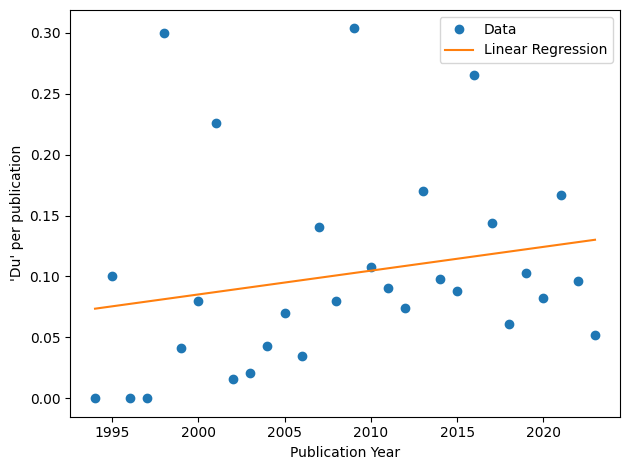

In [24]:
# Visualize the data of 'Du' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' per publication')
plt.legend()
plt.savefig('../Visuals/count_du_per_publication.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:      du_ratio_per_word   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                   0.07354
Date:                Sat, 27 Jan 2024   Prob (F-statistic):              0.788
Time:                        09:37:33   Log-Likelihood:                 221.58
No. Observations:                  30   AIC:                            -439.2
Df Residuals:                      28   BIC:                            -436.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0016      0.007  

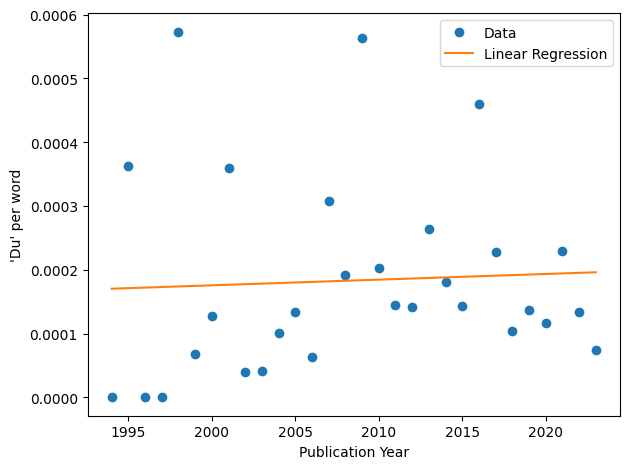

In [25]:
# Visualize the data of 'Du' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' per word')
plt.legend()
plt.savefig('../Visuals/count_du_per_word.png')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     articles_with_du_ratio   R-squared:                       0.074
Model:                                OLS   Adj. R-squared:                  0.041
Method:                     Least Squares   F-statistic:                     2.232
Date:                    Sat, 27 Jan 2024   Prob (F-statistic):              0.146
Time:                            09:37:33   Log-Likelihood:                 73.178
No. Observations:                      30   AIC:                            -142.4
Df Residuals:                          28   BIC:                            -139.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


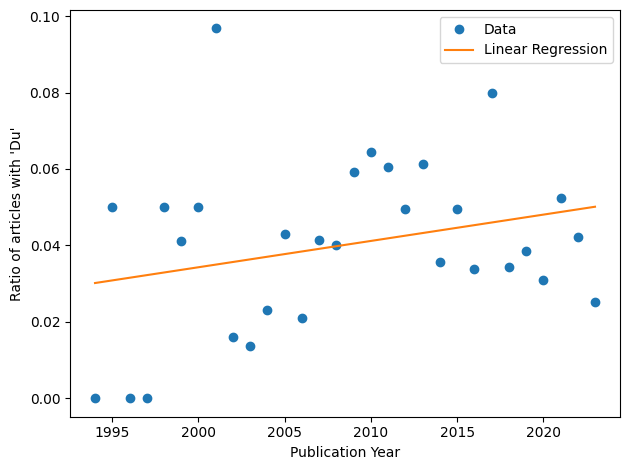

In [26]:
# Visualize the data of articles with 'Du' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_du_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Du\'')
plt.legend()
plt.savefig('../Visuals/articles_with_du_ratrio.png')
plt.show()

### Overview over the usage of 'Ihr'

                              OLS Regression Results                             
Dep. Variable:     ihr_ratio_per_article   R-squared:                       0.016
Model:                               OLS   Adj. R-squared:                 -0.020
Method:                    Least Squares   F-statistic:                    0.4450
Date:                   Sat, 27 Jan 2024   Prob (F-statistic):              0.510
Time:                           09:37:33   Log-Likelihood:                -20.107
No. Observations:                     30   AIC:                             44.21
Df Residuals:                         28   BIC:                             47.02
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

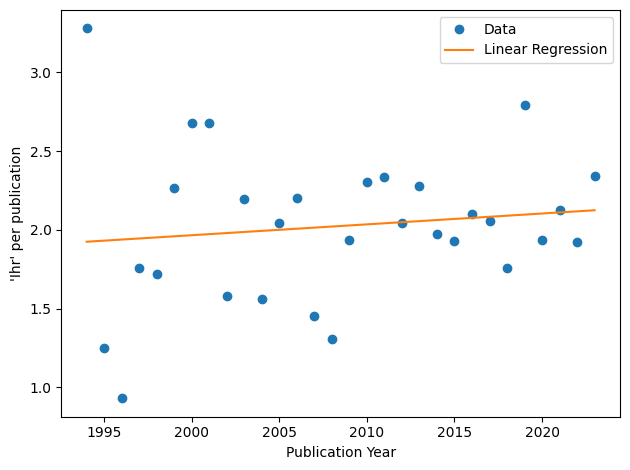

In [27]:
# Visualize the data of 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['ihr_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Ihr\' per publication')
plt.legend()
plt.savefig('../Visuals/count_ihr_per_publication.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:     ihr_ratio_per_word   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     7.404
Date:                Sat, 27 Jan 2024   Prob (F-statistic):             0.0111
Time:                        09:37:33   Log-Likelihood:                 177.48
No. Observations:                  30   AIC:                            -351.0
Df Residuals:                      28   BIC:                            -348.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0815      0.029  

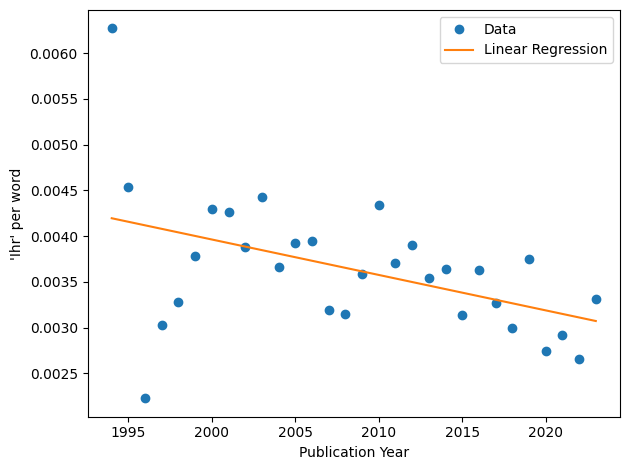

In [28]:
# Visualize the data of 'Ihr' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['ihr_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Ihr\' per word')
plt.legend()
plt.savefig('../Visuals/count_ihr_per_word.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     articles_with_ihr_ratio   R-squared:                       0.104
Model:                                 OLS   Adj. R-squared:                  0.073
Method:                      Least Squares   F-statistic:                     3.267
Date:                     Sat, 27 Jan 2024   Prob (F-statistic):             0.0814
Time:                             09:37:34   Log-Likelihood:                 41.340
No. Observations:                       30   AIC:                            -78.68
Df Residuals:                           28   BIC:                            -75.88
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

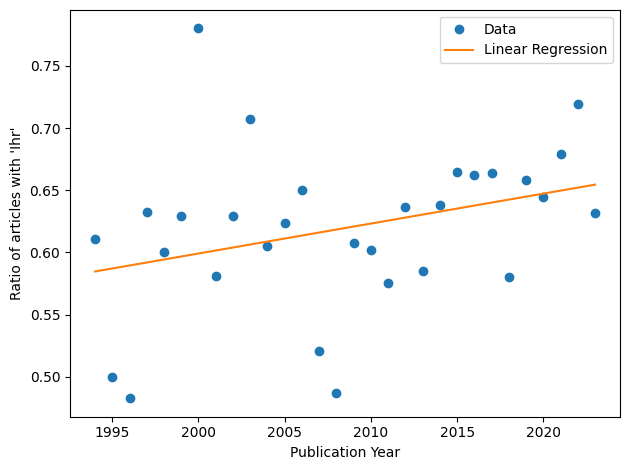

In [29]:
# Visualize the data of articles with 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_ihr_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Ihr\'')
plt.legend()
plt.savefig('../Visuals/articles_with_ihr_ratrio.png')
plt.show()

### Overview over the usage of 'Du' / 'Ihr'

                               OLS Regression Results                               
Dep. Variable:     du_ihr_ratio_per_article   R-squared:                       0.025
Model:                                  OLS   Adj. R-squared:                 -0.010
Method:                       Least Squares   F-statistic:                    0.7081
Date:                      Sat, 27 Jan 2024   Prob (F-statistic):              0.407
Time:                              09:37:34   Log-Likelihood:                -20.623
No. Observations:                        30   AIC:                             45.25
Df Residuals:                            28   BIC:                             48.05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

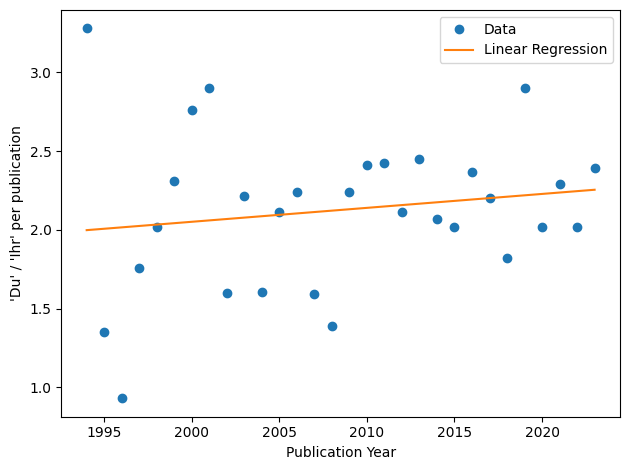

In [30]:
# Visualize the data of 'Du' and 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ihr_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' / \'Ihr\' per publication')
plt.legend()
plt.savefig('../Visuals/count_du_ihr_per_publication.png')
plt.show()

                              OLS Regression Results                             
Dep. Variable:     du_ihr_ratio_per_word   R-squared:                       0.195
Model:                               OLS   Adj. R-squared:                  0.167
Method:                    Least Squares   F-statistic:                     6.801
Date:                   Sat, 27 Jan 2024   Prob (F-statistic):             0.0144
Time:                           09:37:34   Log-Likelihood:                 176.90
No. Observations:                     30   AIC:                            -349.8
Df Residuals:                         28   BIC:                            -347.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

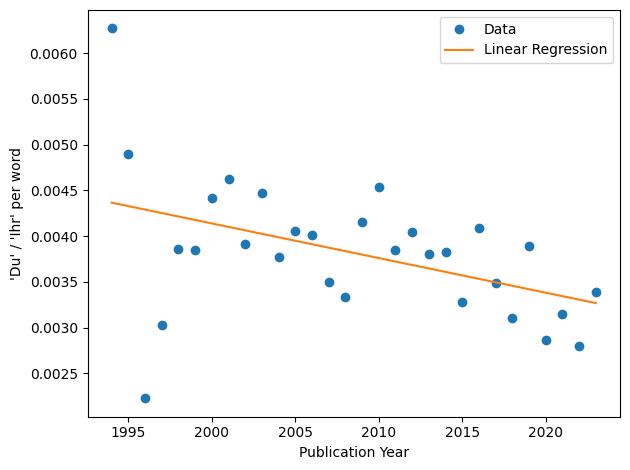

In [31]:
# Visualize the data of 'Du' and 'Ihr' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ihr_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' / \'Ihr\' per word')
plt.legend()
plt.savefig('../Visuals/count_du_ihr_per_word.png')
plt.show()

                                OLS Regression Results                                
Dep. Variable:     articles_with_du_ihr_ratio   R-squared:                       0.121
Model:                                    OLS   Adj. R-squared:                  0.089
Method:                         Least Squares   F-statistic:                     3.842
Date:                        Sat, 27 Jan 2024   Prob (F-statistic):             0.0600
Time:                                09:37:34   Log-Likelihood:                 42.746
No. Observations:                          30   AIC:                            -81.49
Df Residuals:                              28   BIC:                            -78.69
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

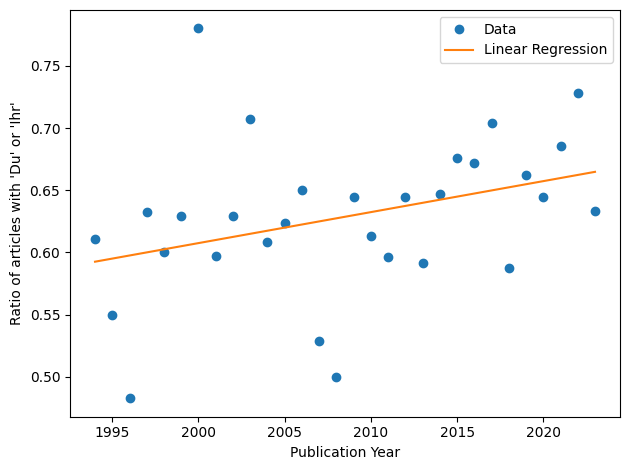

In [32]:
# Visualize the data of articles with 'Du' and 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_du_ihr_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Du\' or \'Ihr\'')
plt.legend()
plt.savefig('../Visuals/articles_with_du_ihr_ratrio.png')
plt.show()

### Correlation Analysis

In [50]:
df.head()

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,questions_count,characters_count,questions_ratio,du_count,ihr_count,du_ihr_count,has_du,has_ihr,has_du_ihr
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,"(Wenn, Großbritannien, Ende, März, den, Aussti...",7,1,5529,0.000181,0,5,5,False,True,True
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,0,5177,0.000000,0,1,1,False,True,True
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,0,4622,0.000000,0,4,4,False,True,True
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,"(Maastricht, (, AP, ), -, Das, niederländische...",0,0,1575,0.000000,0,0,0,False,False,False
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,"(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",2,0,4588,0.000000,0,0,0,False,False,False


In [47]:
# Correlation between number of questions and number of 'Du' or 'Ihr' per article
df['questions_count'].corr(df['du_ihr_count'])

0.3568155073424369

In [48]:
# Create a new dataframe df_yearly_all that contains the data of df_yearly_overview and df_grouped
df_yearly_all = df_yearly_overview.copy()
df_yearly_all = df_yearly_all.merge(df_grouped, on='publication_year')

In [49]:
# Correlation between number of questions per character and number of 'Du' or 'Ihr' per word, aggregated by year
df_yearly_all['questions_ratio'].corr(df_yearly_all['du_ihr_ratio_per_word'].astype(float))

-0.1758909863365847